Trainingsdaten 

In [9]:
import json
import regex as re
import statistics
import matplotlib.pyplot as plt
from collections import Counter


In [10]:
Path = r"shakespeare.json"

In [11]:
text_entries = []

try:
    with open(Path, "r") as json_file:
        for line in json_file:
            try:
                json_data = json.loads(line)

                if 'text_entry' in json_data:
                    text_entries.append(json_data['text_entry'])

            except json.JSONDecodeError:
                print("error")
    print(f"Text Zeilen:{len(text_entries)}")


except FileNotFoundError:
    print(f"Die Datei {json_file_path} wurde nicht gefunden.")
except Exception as e:
    print(f"Ein Fehler ist aufgetreten: {str(e)}")



Text Zeilen:111396


1. Länge der Redebeiträge

In [12]:
n = []
for i in text_entries:
    l = i.split(" ")
    n.append(len(l))


2. Median Länge Redebeiträge

In [13]:
median = statistics.median(n)
print(f"Median Länge Redebeiträge:{median}")

Median Länge Redebeiträge:8.0


3. Anzahl der Tokens

In [14]:
print(f"Anzahl der Tokens: {sum(n)}")

Anzahl der Tokens: 815988


4. Abkürzungen

In [16]:
regex = r"\b[IVXLCDM]+|Scene|Act\b"

abbreviation_list = []


for i in text_entries:
    matches = re.findall(regex, i)
    if(len(matches)>1):
        abbreviation_list.append(matches)
    
print(f"Abkürzungen: {abbreviation_list}")


Abkürzungen: [['I', 'L'], ['L', 'L'], ['M', 'M'], ['I', 'L'], ['I', 'M'], ['II', 'L'], ['D', 'I'], ['I', 'L', 'I'], ['I', 'I'], ['I', 'I'], ['I', 'I'], ['L', 'I', 'I'], ['I', 'I'], ['L', 'I'], ['I', 'I'], ['I', 'I', 'I'], ['L', 'I'], ['I', 'I'], ['III', 'L'], ['M', 'I'], ['I', 'I'], ['L', 'M'], ['M', 'L'], ['I', 'I'], ['I', 'M'], ['I', 'M'], ['I', 'I'], ['I', 'L', 'M'], ['I', 'C'], ['L', 'I'], ['I', 'C'], ['C', 'M'], ['M', 'I'], ['I', 'I'], ['I', 'I'], ['C', 'I'], ['I', 'I'], ['I', 'I'], ['I', 'I'], ['I', 'I', 'I', 'I'], ['I', 'I'], ['I', 'I'], ['I', 'L'], ['M', 'M'], ['D', 'I'], ['I', 'I'], ['C', 'C'], ['I', 'I'], ['I', 'M'], ['D', 'I'], ['I', 'I'], ['L', 'I'], ['I', 'D'], ['I', 'I'], ['I', 'I'], ['I', 'I'], ['L', 'I'], ['L', 'I'], ['L', 'M', 'I'], ['L', 'I'], ['D', 'M'], ['I', 'I', 'I'], ['I', 'I'], ['L', 'I'], ['I', 'I', 'I'], ['I', 'I'], ['I', 'I'], ['I', 'I'], ['I', 'I'], ['I', 'I'], ['I', 'I'], ['I', 'I'], ['L', 'I'], ['I', 'I'], ['I', 'I'], ['I', 'I'], ['M', 'I', 'I'], ['I', 'I'

5. Kontraktionen am Beispiel he's

In [17]:
regex = r" hes "

abbreviation_list = []


for i in text_entries:
    matches = re.findall(regex, i)
    if(len(matches)>1):
        abbreviation_list.append(matches)
    
print(f"Kontraktion am Beispiel he's: {abbreviation_list}")

Kontraktion am Beispiel he's: [[' hes ', ' hes '], [' hes ', ' hes '], [' hes ', ' hes ', ' hes '], [' hes ', ' hes ', ' hes '], [' hes ', ' hes ']]


6. Zeichnung eines Plots zur Darstellung der Worthäufigkeiten

In [18]:
b = []

for i in text_entries:
    l = i.split(" ")
    for a in l:
        b.append(a)


In [19]:
häufigkeiten = Counter(b)

sortierte_häufigkeiten = häufigkeiten.most_common()

wörter, frequenzen = zip(*sortierte_häufigkeiten)

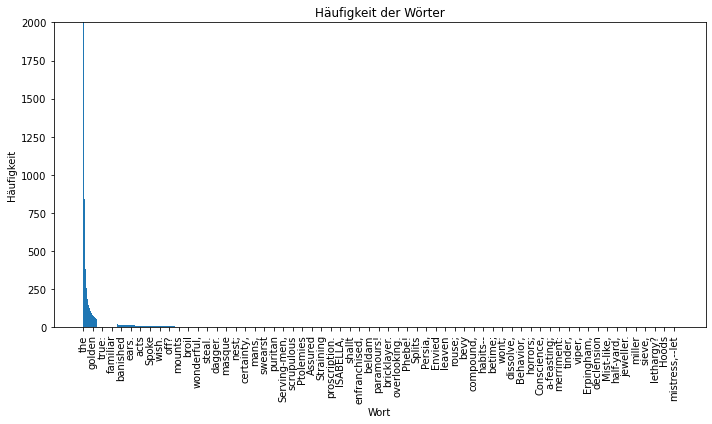

In [20]:
plt.figure(figsize=(10, 6))

plt.ylim(0, 2000)

plt.xticks(range(0, len(wörter), 1000), rotation=90)

plt.bar(wörter, frequenzen)
plt.xlabel('Wort')
plt.ylabel('Häufigkeit')
plt.title('Häufigkeit der Wörter')
plt.tight_layout()
plt.savefig('balkendiagramm.png')

plt.show()